In [60]:
%matplotlib inline

import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm 
import scipy as sc
import re
import scipy.optimize

from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=1.2)

In [61]:
## change the path to your data file
dir = "C:\\Users\\ksk\\Box Sync\\Pythons\\PsychoPy\\DynamicChangeBlindness-master\\experiment\\Results\\"

print  (os.listdir( dir  ))
print(len(os.listdir(dir)))

['Analyse.ipynb', 'Sub1-male-age40-ver1.0-2019-11-24-14-18-19.csv', 'Sub2-male-age40-ver1.0-2019-11-25-16-43-37.csv', 'Sub3-male-age40-ver1.0-2019-11-27-09-49-08.csv', 'Sub4-male-age-ver1.0-2019-11-25-17-45-07.csv', 'Sub5-male-age-ver1.0-2019-11-27-14-27-03.csv']
6


In [62]:
## Read from the data file

a_main = pd.DataFrame()

filelist = os.listdir(dir)
for f in filelist:
    root, ext = os.path.splitext(f)
    if ext != '.csv':
        continue;
    
    print(dir + f)
    
    main = pd.read_csv(dir + f, delimiter=',', header=0, index_col =False)
    a_main = pd.concat([a_main, main], ignore_index=True)
            

C:\Users\ksk\Box Sync\Pythons\PsychoPy\DynamicChangeBlindness-master\experiment\Results\Sub1-male-age40-ver1.0-2019-11-24-14-18-19.csv
C:\Users\ksk\Box Sync\Pythons\PsychoPy\DynamicChangeBlindness-master\experiment\Results\Sub2-male-age40-ver1.0-2019-11-25-16-43-37.csv
C:\Users\ksk\Box Sync\Pythons\PsychoPy\DynamicChangeBlindness-master\experiment\Results\Sub3-male-age40-ver1.0-2019-11-27-09-49-08.csv
C:\Users\ksk\Box Sync\Pythons\PsychoPy\DynamicChangeBlindness-master\experiment\Results\Sub4-male-age-ver1.0-2019-11-25-17-45-07.csv
C:\Users\ksk\Box Sync\Pythons\PsychoPy\DynamicChangeBlindness-master\experiment\Results\Sub5-male-age-ver1.0-2019-11-27-14-27-03.csv


In [63]:
print(a_main.columns)

Index(['SubId', 'ExpType', 'trialId', 'condition', 'response'], dtype='object')


In [64]:
## set the label for condition

def transconum(label):
    if (label == 1):
        return 'Control'
    else:
        return 'Target'
    
a_main['Condition'] = a_main['condition'].apply(transconum)

In [65]:
## grouping with subject

g_main = pd.DataFrame({'response' : a_main.groupby(['SubId', 'ExpType', 'Condition'])['response'].mean()}).reset_index()


# Plot each subject data

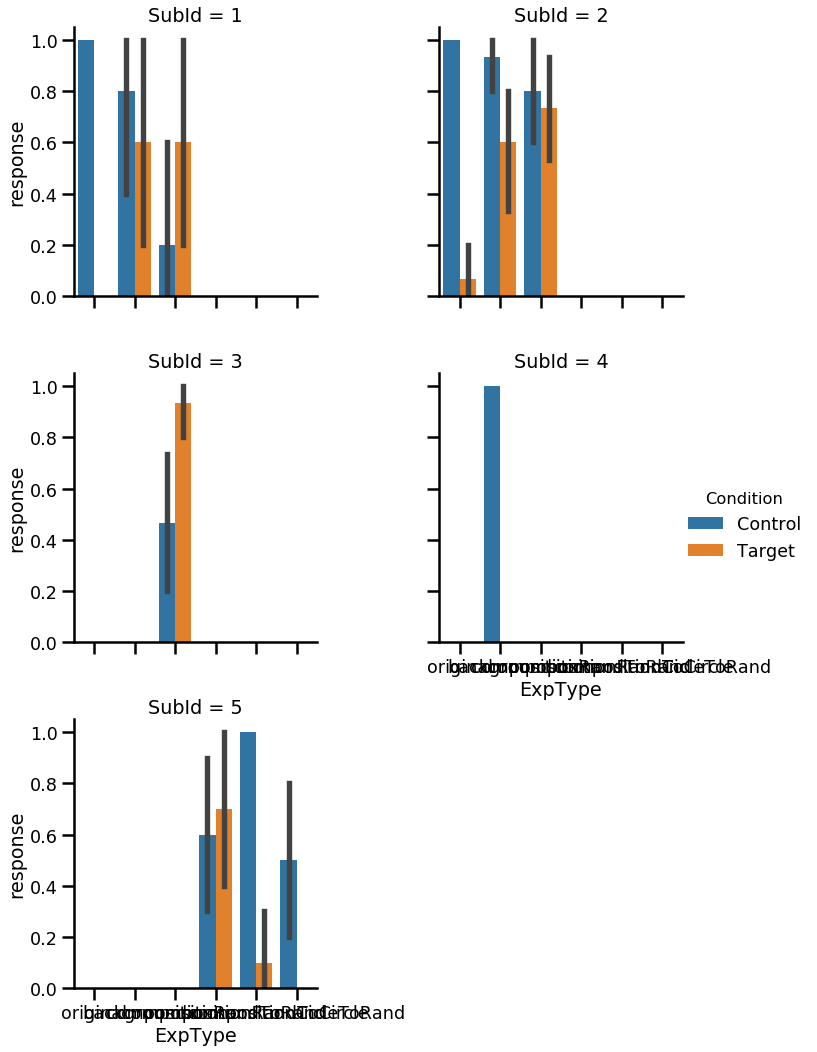

In [66]:
sns.set_context("poster", font_scale=0.8)
g = sns.catplot(x='ExpType', y='response', data=a_main, hue='Condition', col='SubId', col_wrap=2, kind='bar')


## Plot all data

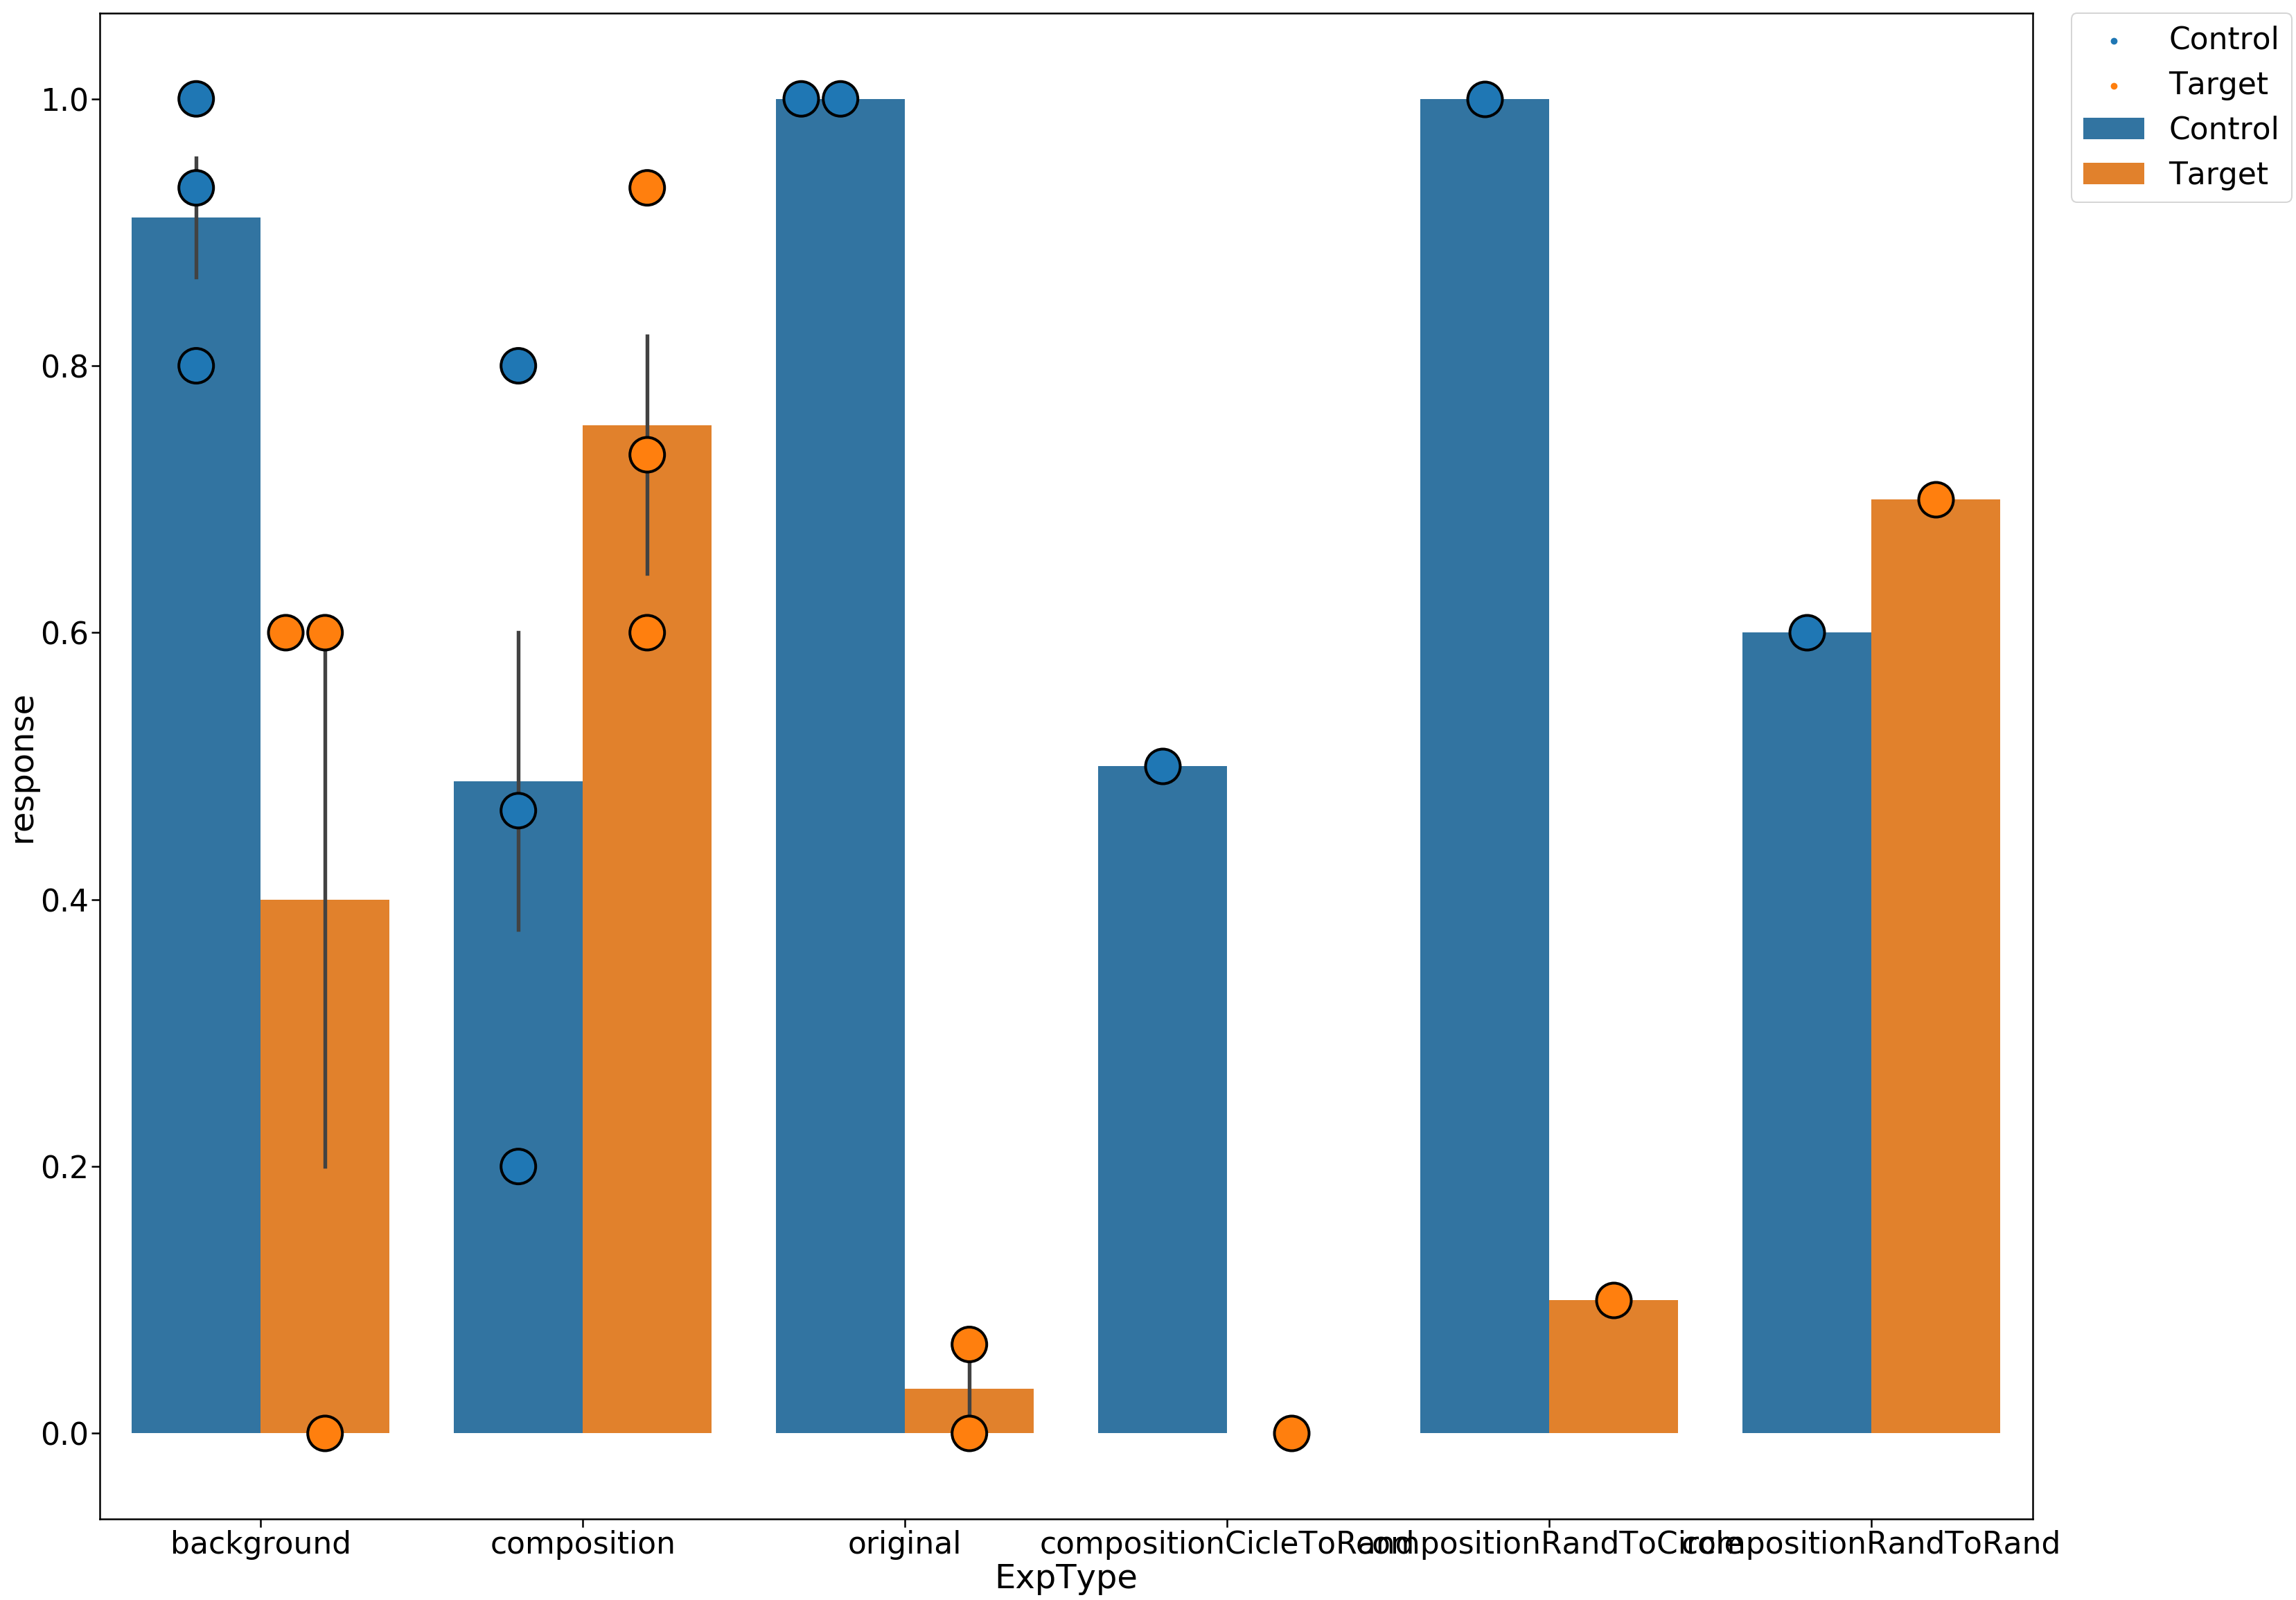

In [67]:
sns.set_context("poster", font_scale=2)
plt.subplots(figsize=(50, 40))

g = sns.swarmplot(x="ExpType", y="response", data=g_main, hue='Condition', dodge=True, size=50.0, edgecolor='black', linewidth=4);
g = sns.barplot(x='ExpType', y='response', data=g_main, hue='Condition' , ci=68)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

